In [1]:
import pandas as pd
import h5py
import numpy as np
import seaborn as sns
import glob
import matplotlib.pyplot as plt

In [2]:
perf_csv = glob.glob('./result/eclip_result/*.csv')
perf_csv

['./result/eclip_result/cnn_perf.csv',
 './result/eclip_result/NT32_MLP_perf.csv',
 './result/eclip_result/NT32_perf.csv',
 './result/eclip_result/NT32_logistic_perf.csv',
 './result/eclip_result/NT10_MLP_perf.csv',
 './result/eclip_result/NT10_logistic_perf.csv',
 './result/eclip_result/NT10_perf.csv',
 './result/eclip_result/gpn_perf.csv']

In [3]:
total_perf = pd.DataFrame()
for f in perf_csv:
    model = f.split('/')[-1][:-9]
    df = pd.read_csv(f,index_col=0)
    # if 'Model' not in df.columns:
    #     df['Model'] = model
    total_perf = pd.concat((total_perf,df))
    

In [6]:
tf_list = []
data_size = []
for tf in total_perf['TF'].unique():
    file = '/home/ztang/multitask_RNA/data/eclip/'+tf+'_K562_200.h5'
    f = h5py.File(file, 'r')
    tf_list.append(tf)
    data_size.append(len(f['X_train']))
size_df = pd.DataFrame(list(zip(tf_list, data_size)),columns=['TF','training size'])

In [7]:
total_perf = total_perf.merge(size_df,left_on = 'TF', right_on='TF')

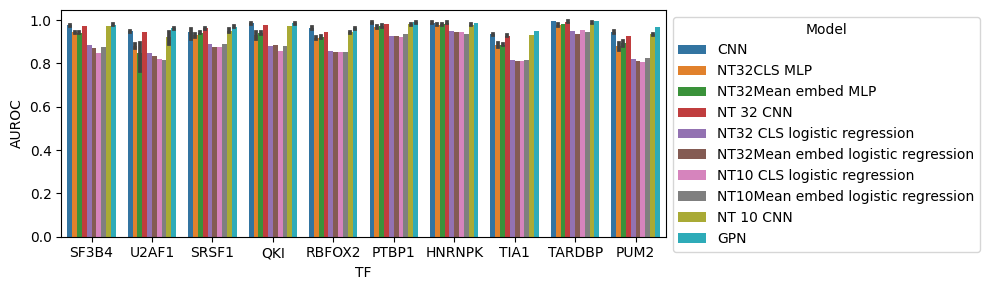

In [8]:
fig,ax = plt.subplots(1,1,figsize = (10,3))
sns.barplot(total_perf, x = 'TF' , y = 'AUROC' , hue = 'Model', ax = ax,palette='tab10')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.tight_layout()

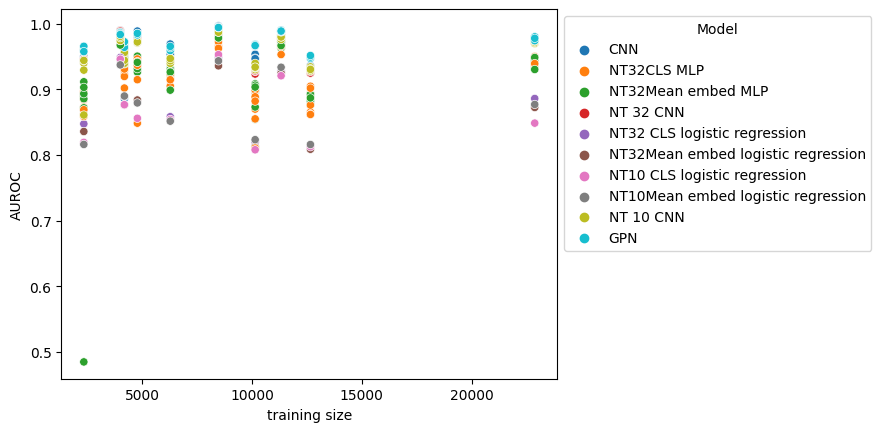

In [9]:
ax = sns.scatterplot(total_perf,x='training size',y='AUROC',hue='Model')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

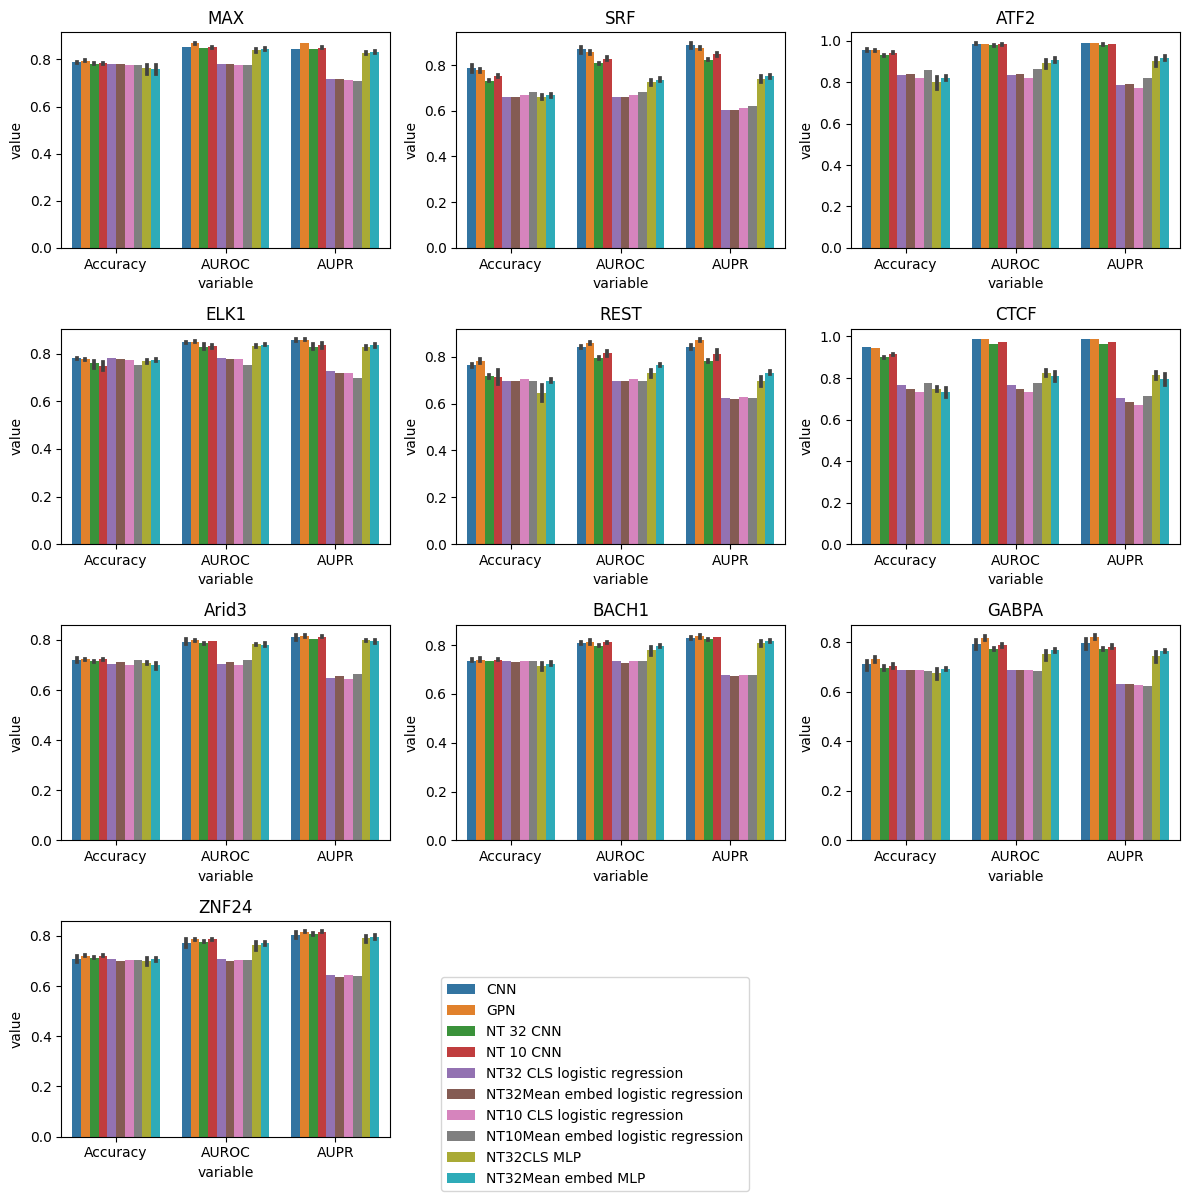

In [11]:
melt_df = pd.melt(total_perf,id_vars = ['TF','Model'],value_vars=['Accuracy','AUROC','AUPR'])
fig,axs = plt.subplots(4,3,figsize = (12,12))
i = 0
for tf in total_perf['TF'].unique():
    sub_perf = melt_df[melt_df['TF'] == tf]
    sns.barplot(sub_perf, x = 'variable', y = 'value', hue = 'Model',ax = axs[i//3,i%3])
    axs[i//3,i%3].title.set_text(tf)
    axs[i//3,i%3].legend_.remove()
    i+=1
handles, labels = axs[(i-1)//3,(i-1)%3].get_legend_handles_labels()
fig.delaxes(axs[3][1])
fig.delaxes(axs[3][2])
fig.legend(handles, labels, loc='lower center')
plt.tight_layout()